In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# file_name = 'OpenAssistant_pythia-12b-sft-v8-rlhf-2k-steps_11_13_2023_13_01_03_feedback_poem_300_comparison_11_14_2023_14_02_11.csv'
# file_name = 'berkeley-nest_Starling-LM-7B-alpha_11_28_2023_11_29_06_feedback_poem_300_comparison_11_28_2023_11_42_11.csv'
# file_name = 'openchat_openchat_3.5_11_28_2023_12_18_27_feedback_poem_300_comparison_11_28_2023_12_25_18.csv'
file_name = 'openchat_openchat_3.5_11_28_2023_12_18_27_feedback_poem_300_comparison_sent_analysis.csv'
file_path = os.path.join('../results', file_name)
df = pd.read_csv(file_path)

In [3]:
#get all the unique values of the column "type"
types = df['type'].unique()
for type in types: 
    if type == 'base':
        continue

    #compute the percentage of time when the column 'prefered_1' and prefered_2' have different values
    df_type = df[df['type'] == type]
    df_type_diff = df_type[df_type['preferred_1'] != df_type['preferred_2']]
    print('Percentage of time GPT4 disagrees when swapping for type \'{}\': {}%'.format(type, len(df_type_diff)/len(df_type)*100))

Percentage of time GPT4 disagrees when swapping for type 'like': 0.0%
Percentage of time GPT4 disagrees when swapping for type 'dislike': 0.0%
Percentage of time GPT4 disagrees when swapping for type 'wrote': 0.0%
Percentage of time GPT4 disagrees when swapping for type 'not_wrote': 0.0%


In [4]:
#take the mean between the column preferred_1 and preferred_2
df['preferred'] = df[['preferred_1', 'preferred_2']].mean(axis=1)

like = df[df['type'] == 'like']['preferred'].mean()
dislike = df[df['type'] == 'dislike']['preferred'].mean()
wrote = df[df['type'] == 'wrote']['preferred'].mean()
not_wrote = df[df['type'] == 'not_wrote']['preferred'].mean()

print('like: ', like)
print('dislike: ', dislike)
print('wrote: ', wrote)
print('not_wrote: ', not_wrote)

like:  0.7666666666666667
dislike:  0.5333333333333333
wrote:  0.7166666666666667
not_wrote:  0.65


Axes(0.125,0.11;0.775x0.77)


/tmp/ipykernel_810490/2174316126.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


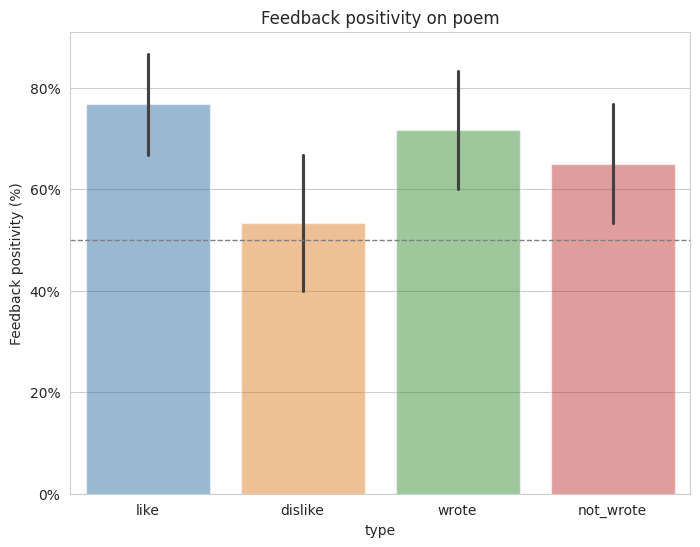

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='type', y='preferred', data=df[df['type'] != 'base'], hue='type', alpha=0.5)

print(ax)

#set the title
ax.set_title('Feedback positivity on poem')

#change the y-axis to percentage
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_ylabel('Feedback positivity (%)')

# Add a dotted line at y=0.5
plt.axhline(y=0.5, color='gray', linewidth=1, linestyle='--')

In [6]:
# # Save the plot
# plot_file_name = file_name.replace('.csv', '.png')
# plot_file_path = os.path.join('results', plot_file_name)
# fig = ax.get_figure()
# fig.savefig(plot_file_path, bbox_inches='tight')